In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import lib_explo as lib


#print(filename_ytrain)
y_train = lib.get_ytrain()
X_train = lib.get_xtrain()
X_test = lib.get_xtest()

df = pd.concat([X_train, y_train], axis=1)


In [5]:
df.head()

,designation,description,productid,imageid,img_shape,img_size,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,"[500, 500]",14010,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,"[500, 500]",14854,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,"[500, 500]",6898,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,"[500, 500]",14404,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,"[500, 500]",20435,2705


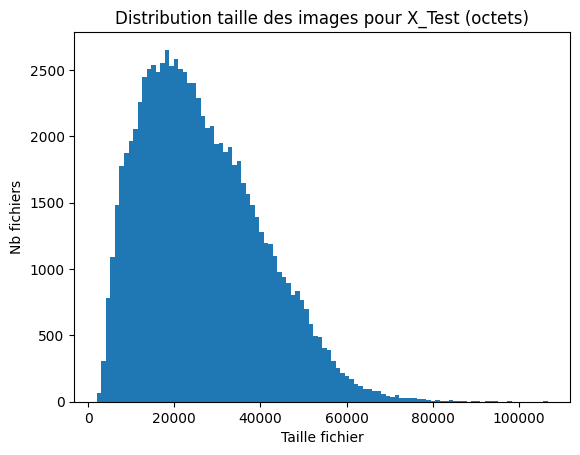

In [7]:
plt.hist(df['img_size'], bins=100)
plt.xlabel('Taille fichier')
plt.ylabel('Nb fichiers')
plt.title("Distribution taille des images pour X_train (octets)")
plt.show()

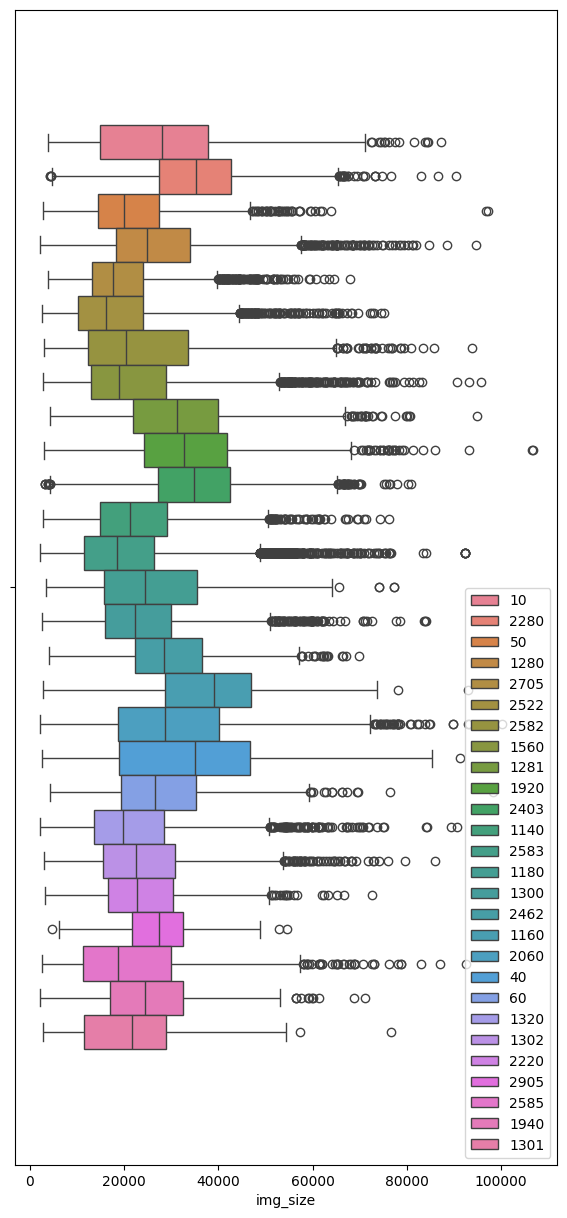

In [27]:
tmp = df
tmp.loc[:,'prdtypecode'] = tmp['prdtypecode'].astype('str')

plt.figure(figsize=(7, 15))
#tmp.boxplot(column='img_size', by='prdtypecode')
sns.boxplot(data=tmp, x='img_size', hue='prdtypecode')
plt.legend(loc='best')
plt.show()

In [86]:
def show_images(category_id, num_images, type='train'):
    """
    Shows a table of the first num_images referring to the category_id (i.e. prdtypecode)
    input : 
     type must be 'train' or 'test'
    """
    if (type!='train') and (type!='test'):
        return None
    tmp = df.loc[df['prdtypecode']==category_id].head(num_images)
    if tmp.shape[0] == 0:
        return None
    nb_cols = 3 # 3 pictures per row
    nb_rows = int(np.ceil(num_images / nb_cols))
    fig, axes = plt.subplots(nb_rows, nb_cols)
    fig.set_figwidth(15)
    index_i = 0
    index_j = 0
    for index in range(0, num_images):
        #axes[index_i, index_j] = fig.add_subplot(nb_rows, nb_cols, index_ax)
        product_id = tmp.iloc[index, :]['productid']
        image_id = tmp.iloc[index, :]['imageid']
        img = lib.get_image(product_id, image_id, type)
        axes[index_i, index_j].axis('off')
        if (len(img)>0):
            axes[index_i, index_j].imshow(img)
            axes[index_i, index_j].axis('off')
            axes[index_i, index_j].set_title("Product ID: "+str(product_id), fontsize=10)
            if index_j + 1 == nb_cols:
                index_j = 0
                index_i = index_i + 1
            else:
                index_j = index_j + 1
    while index_j < nb_cols:
        axes[index_i, index_j].axis('off')
        index_j = index_j + 1

    fig.suptitle('Category ID = ' + str(category_id))
    fig.show()

/tmp/ipykernel_1544/3504232753.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(nb_rows, nb_cols)


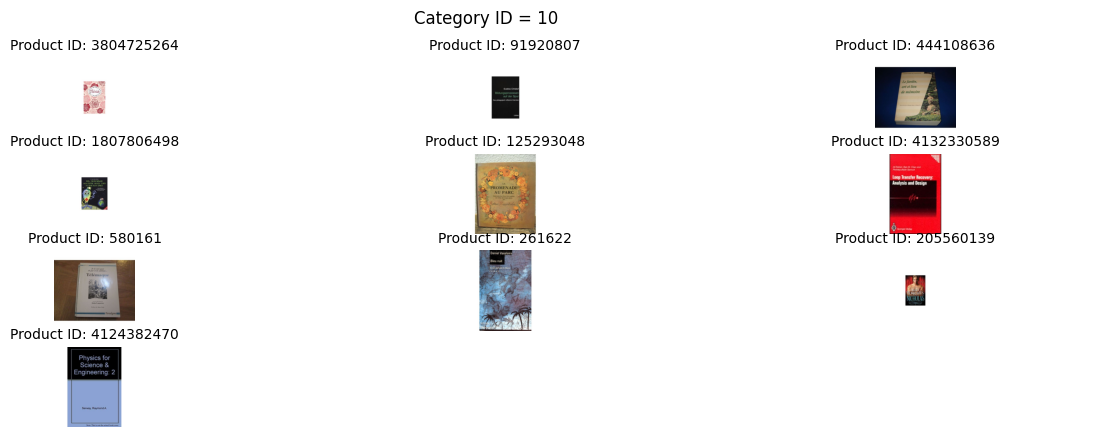

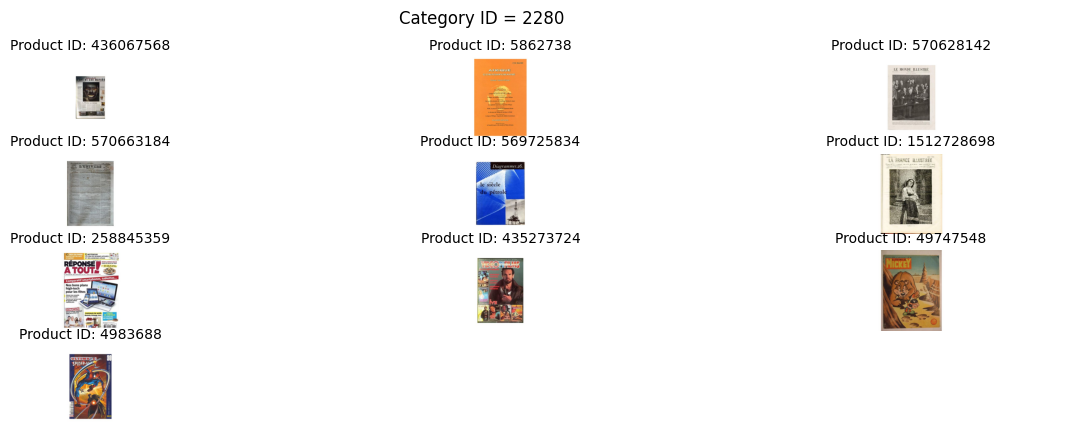

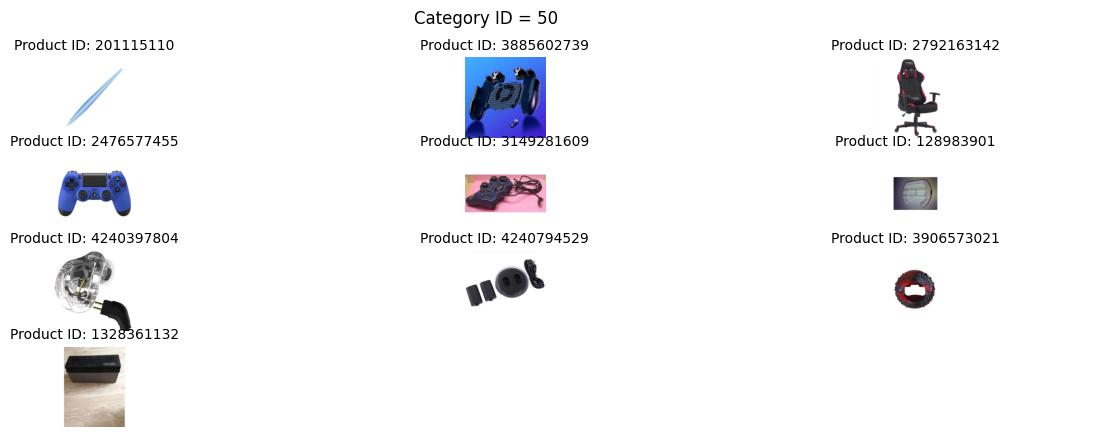

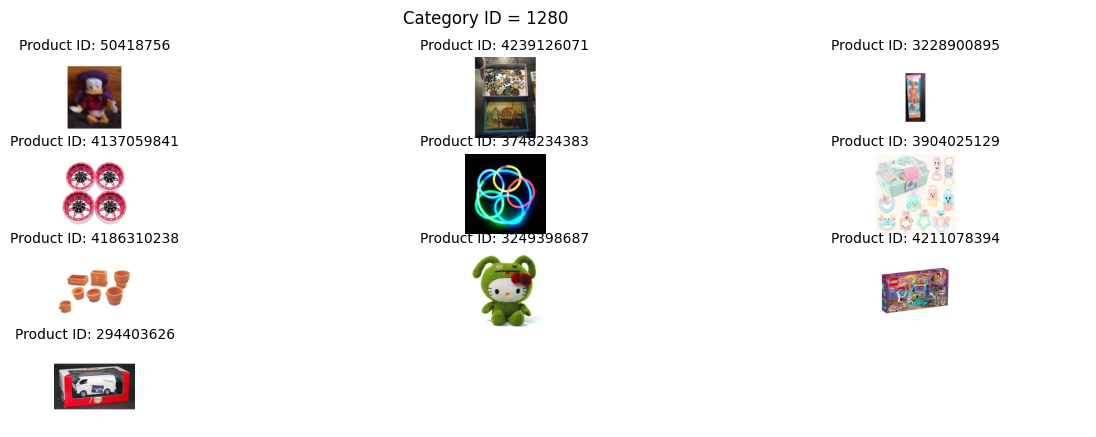

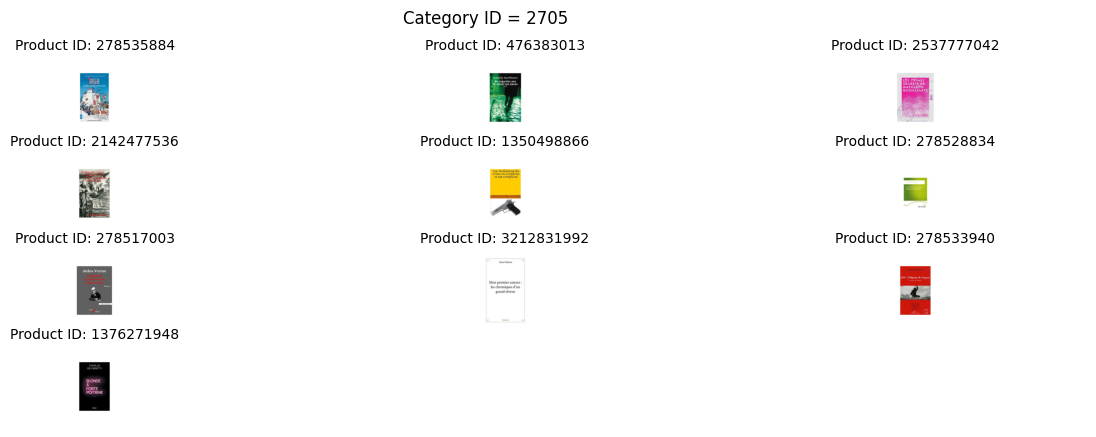

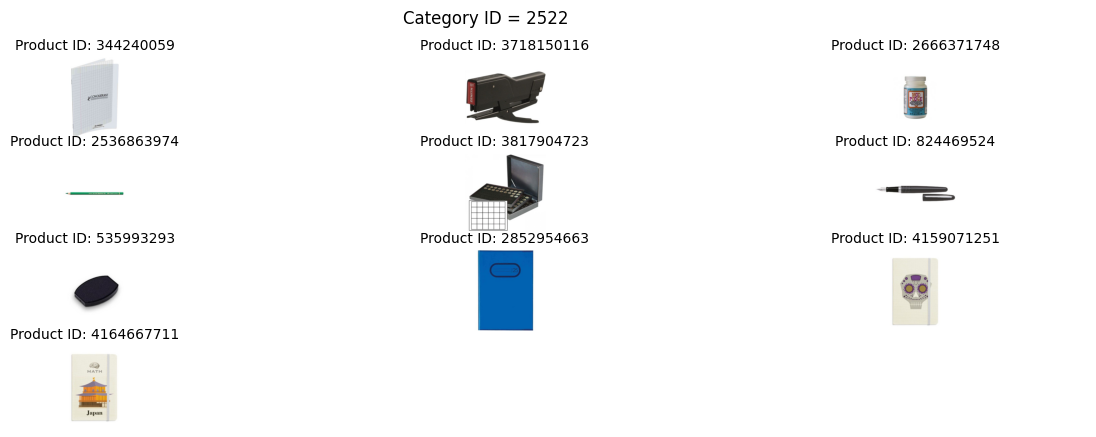

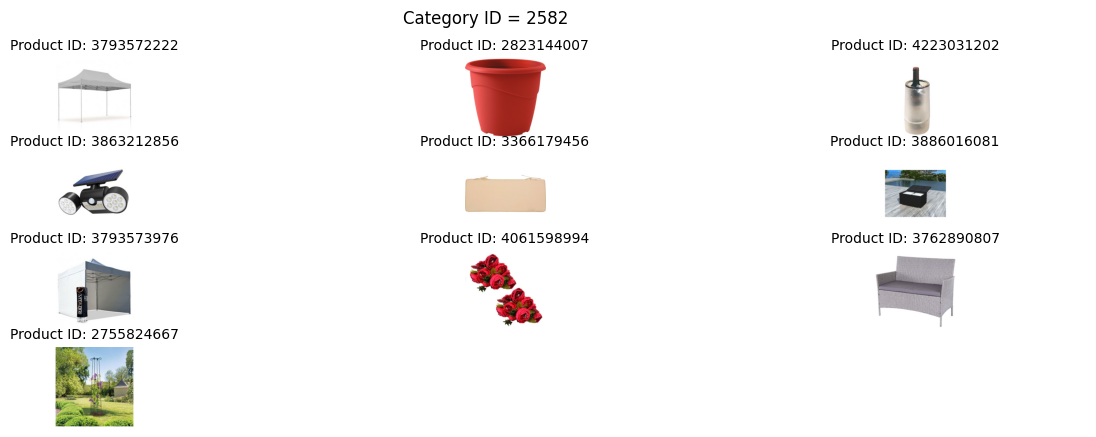

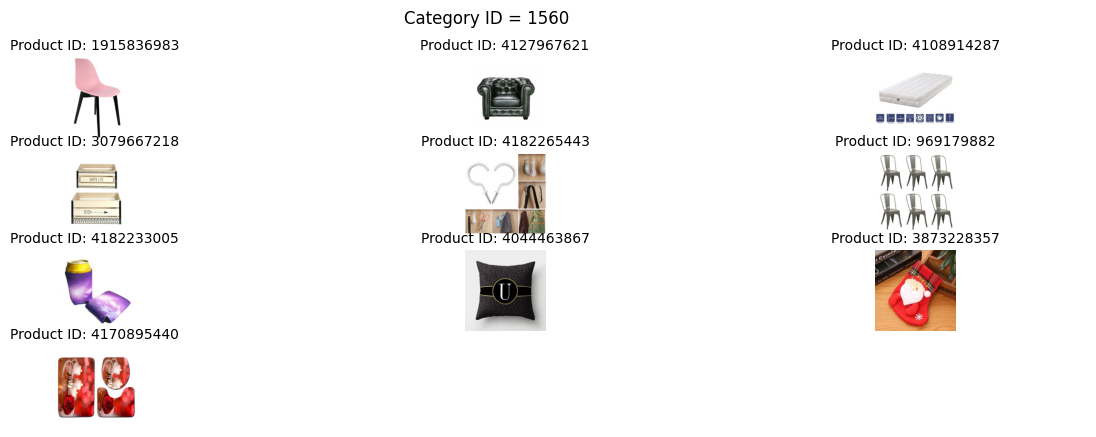

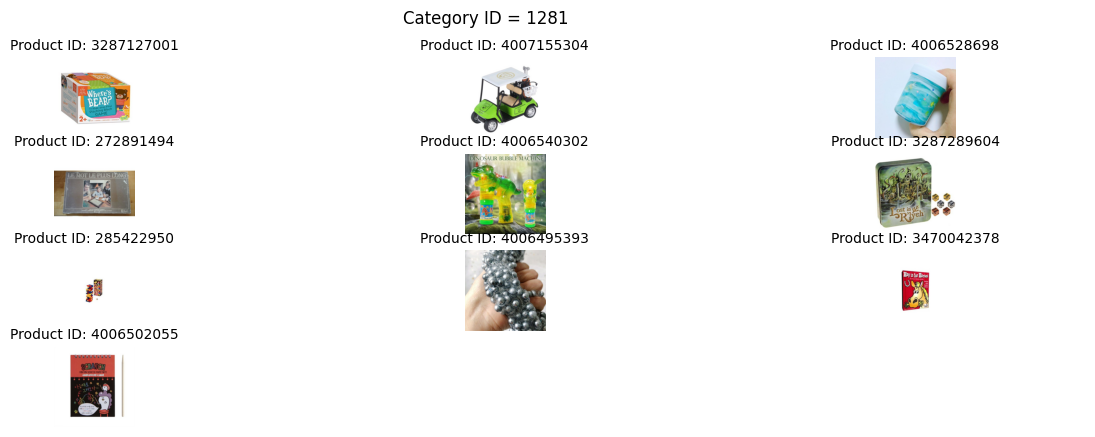

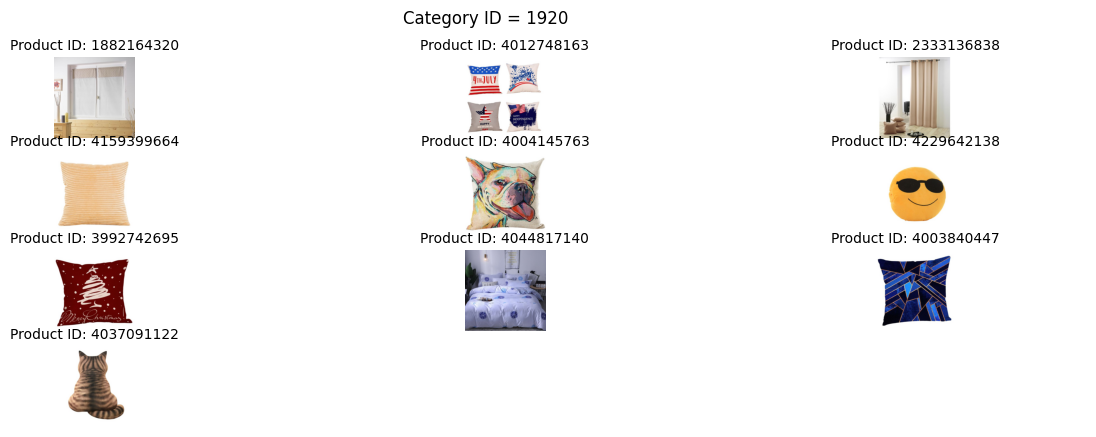

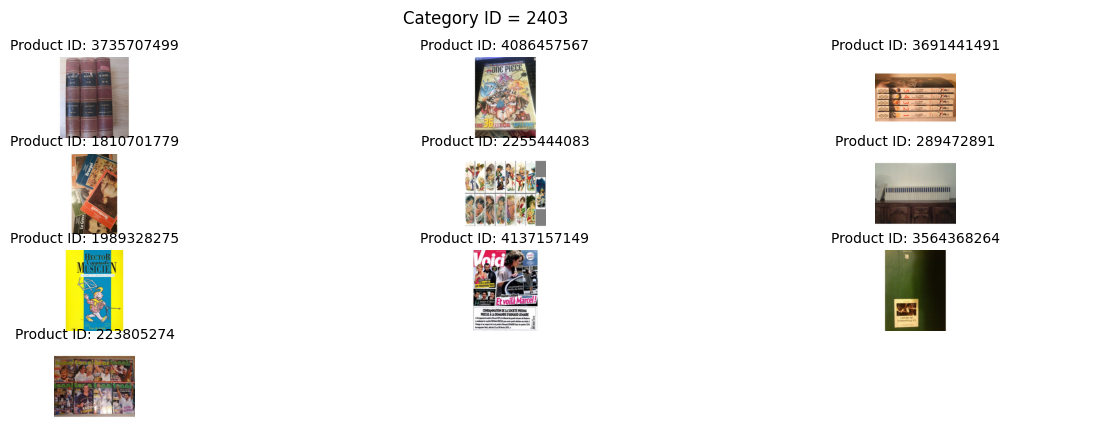

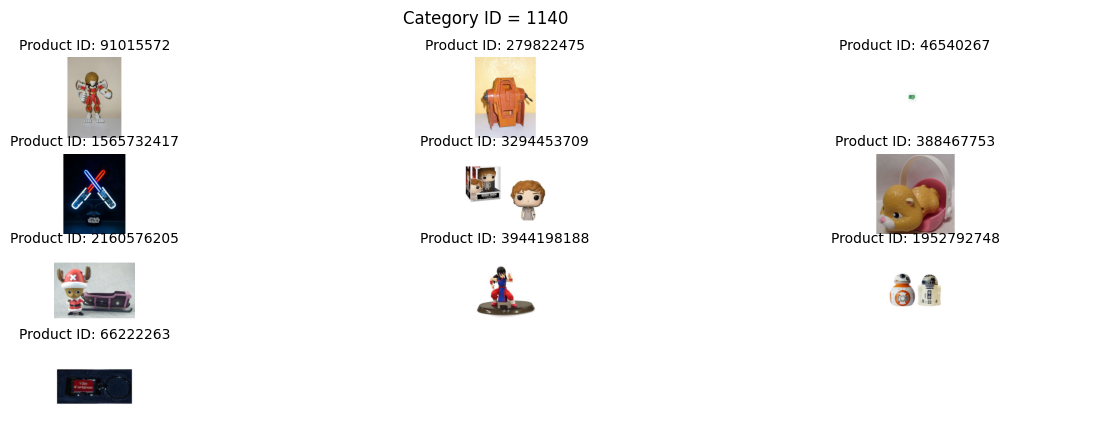

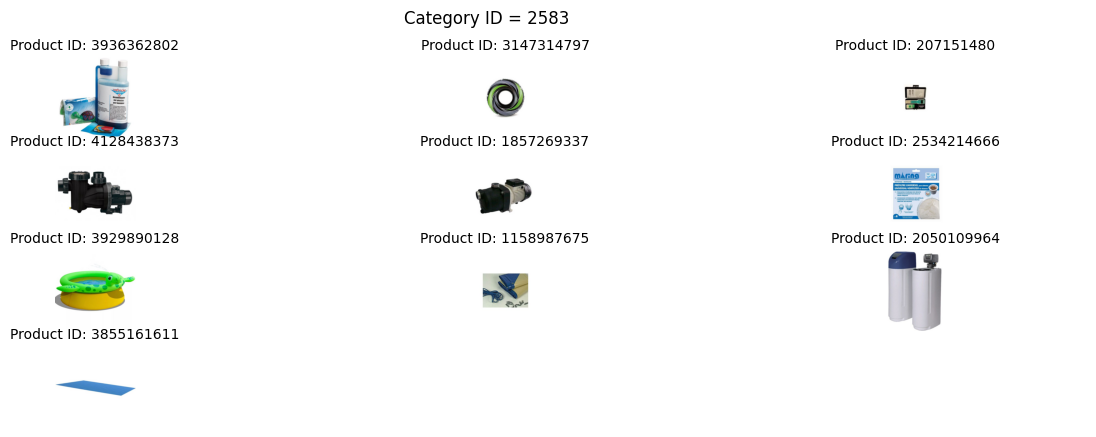

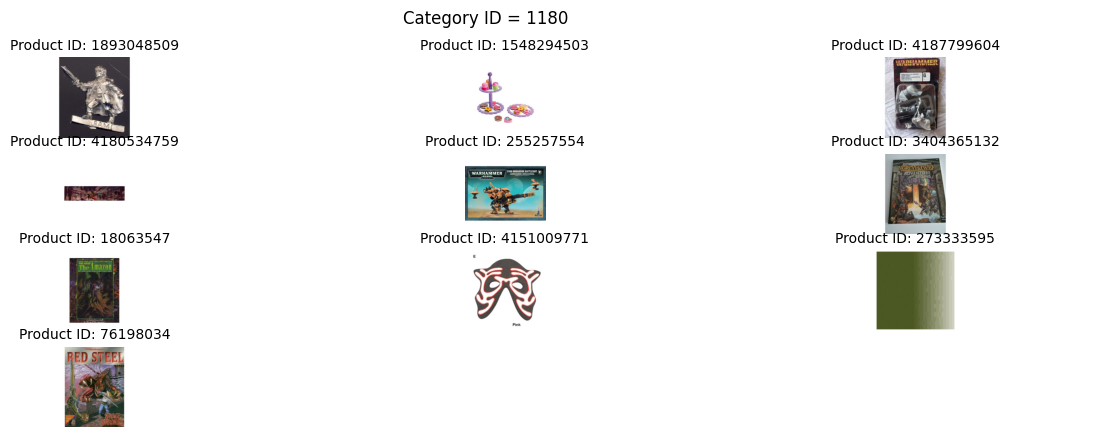

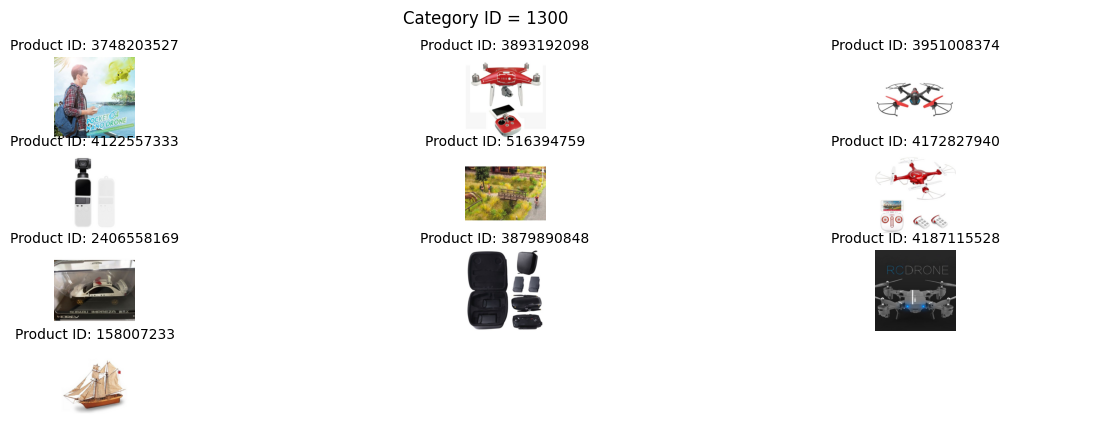

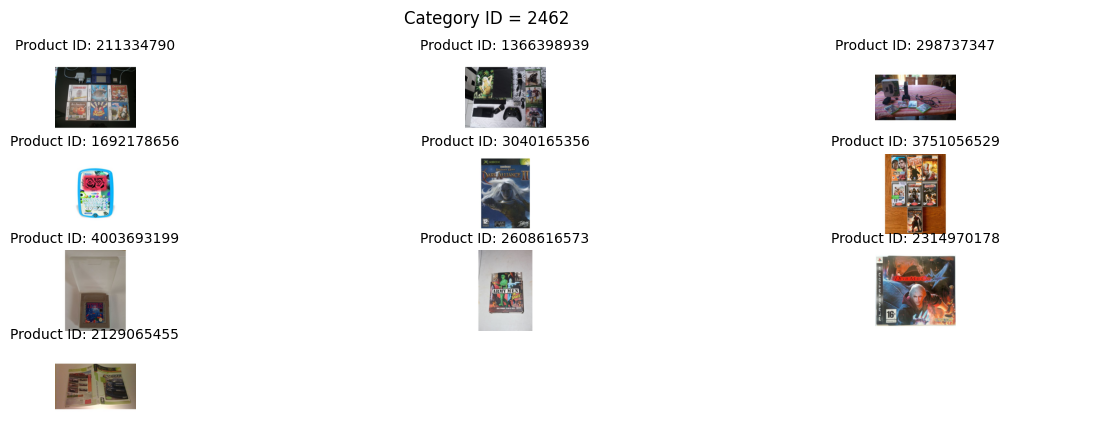

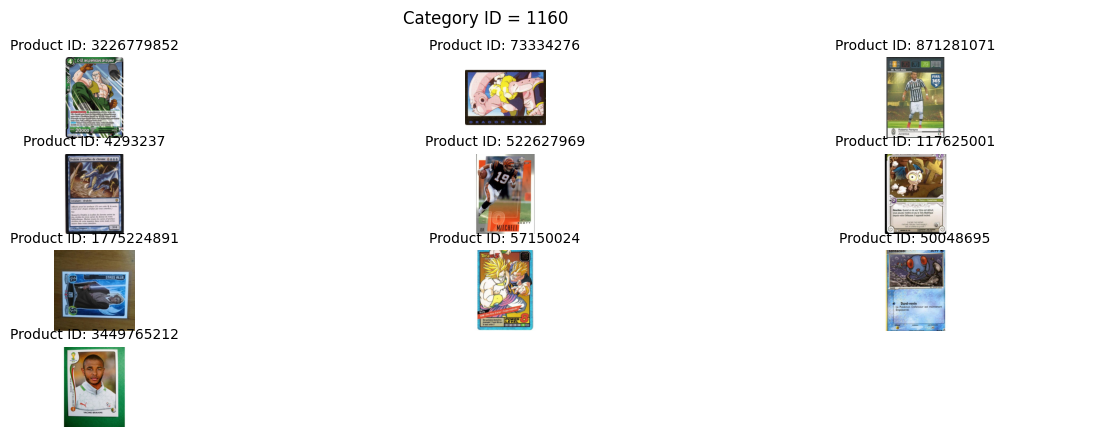

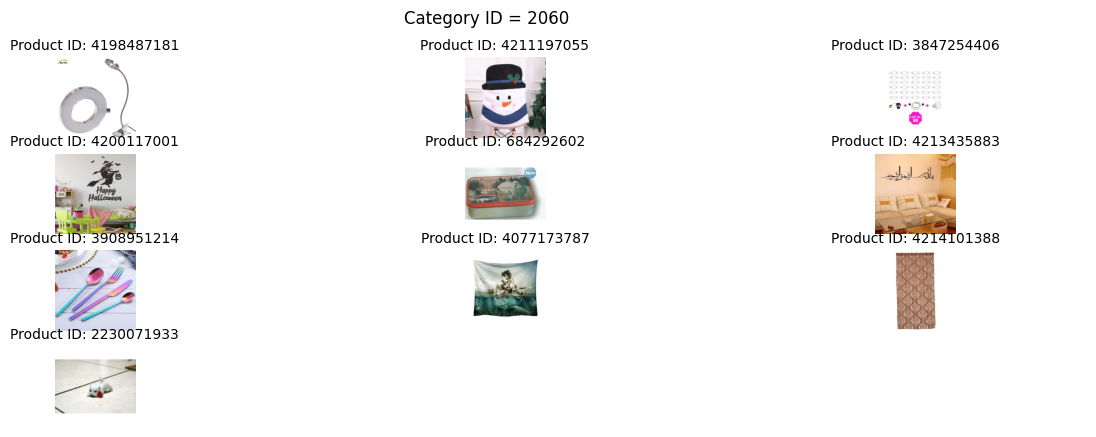

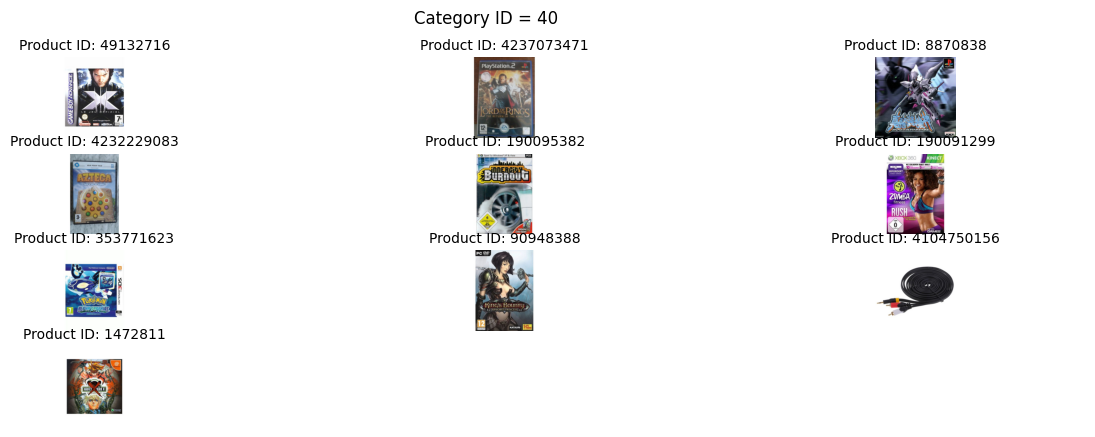

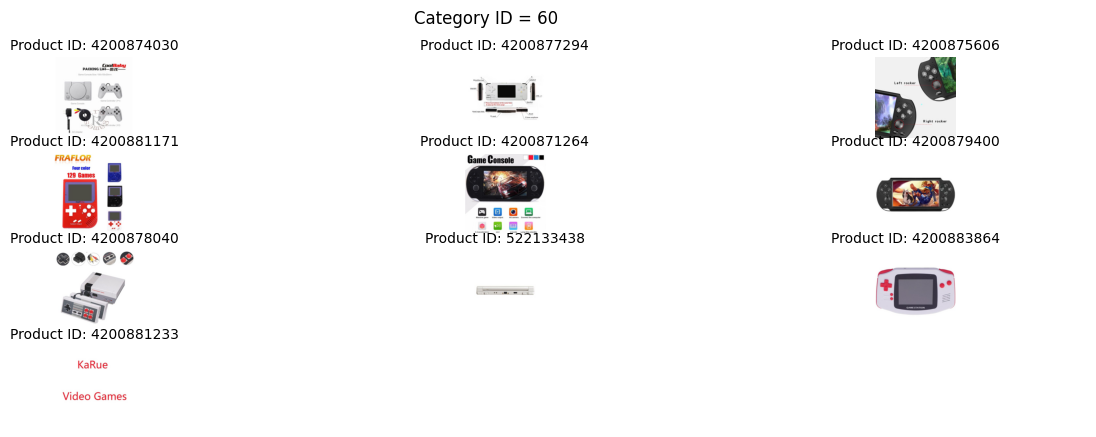

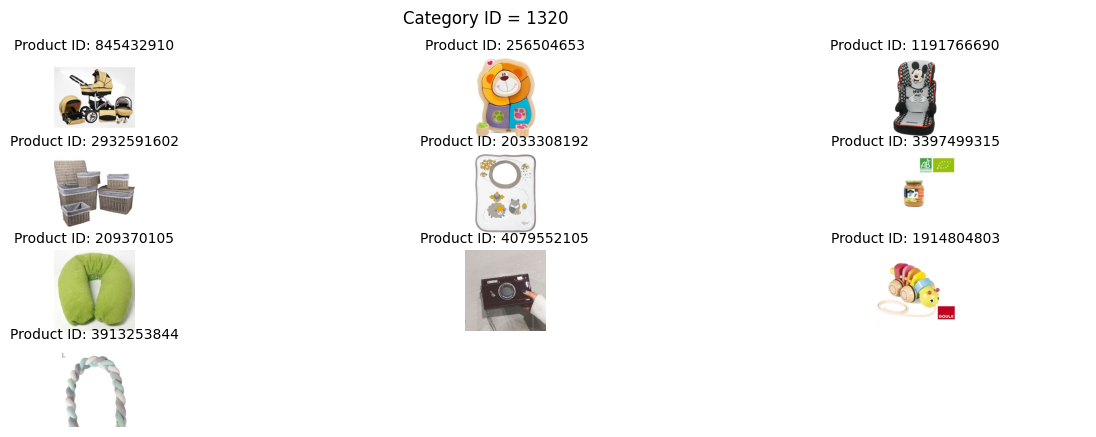

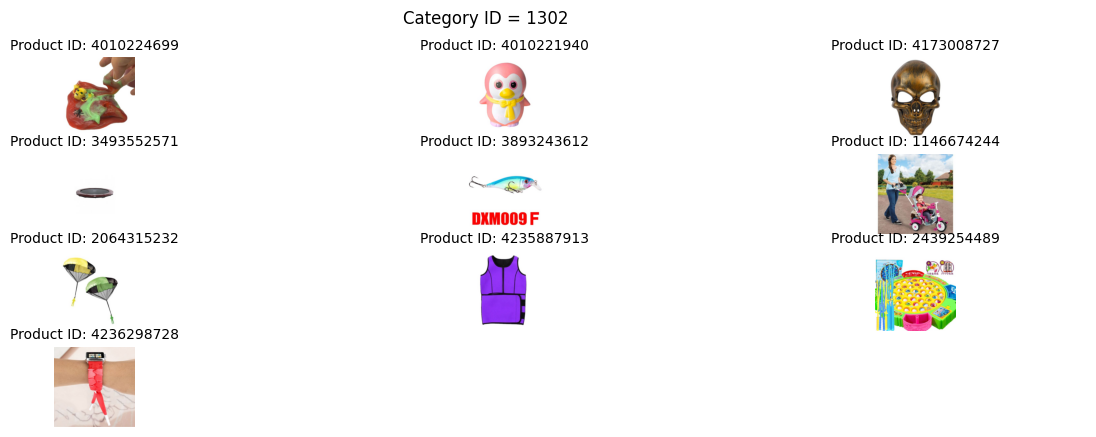

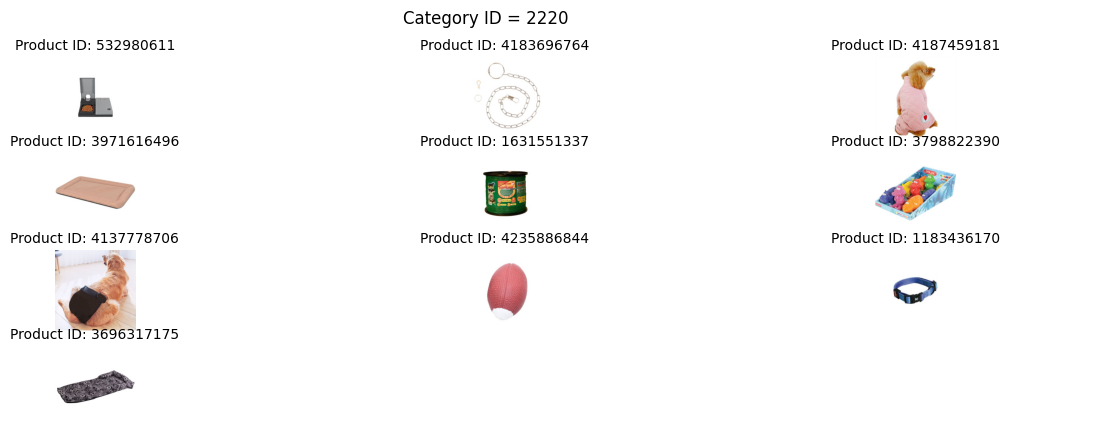

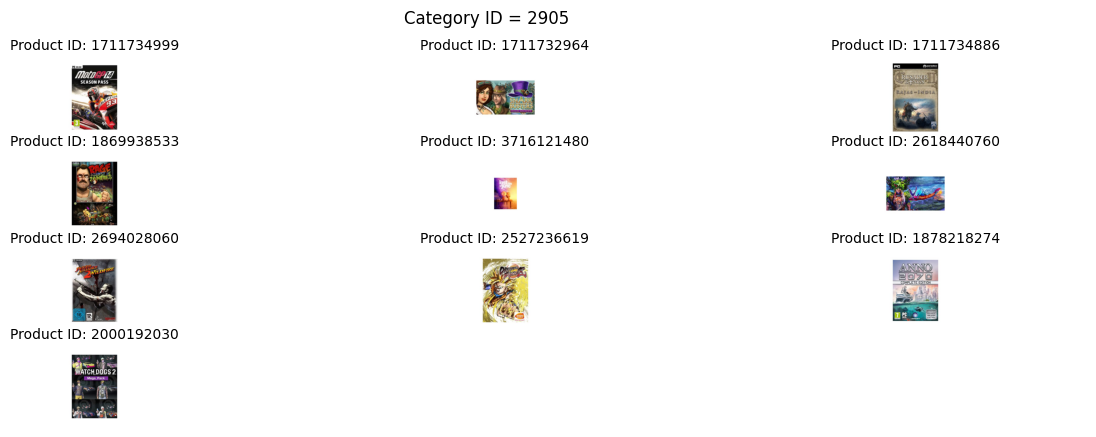

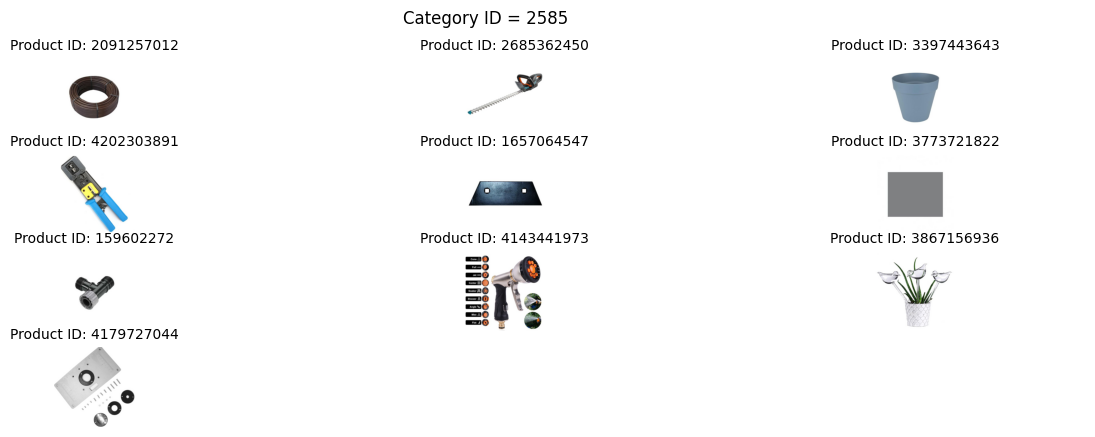

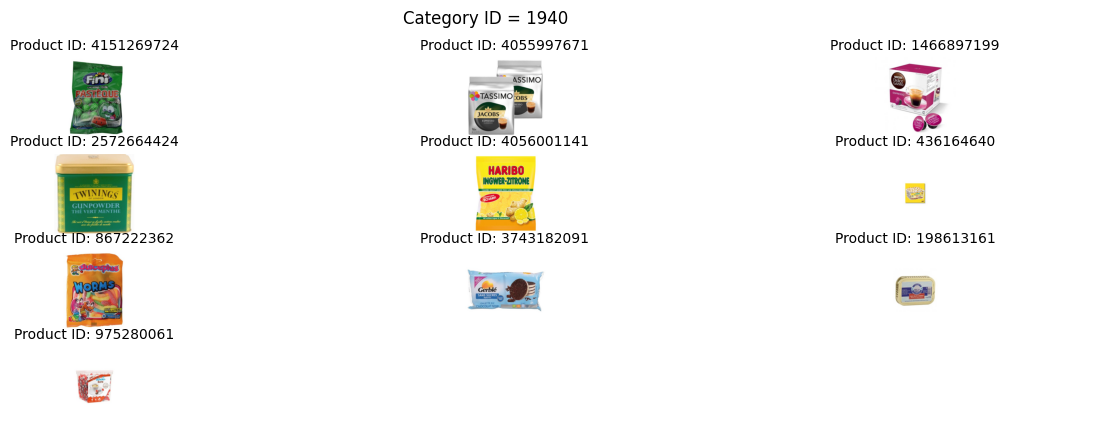

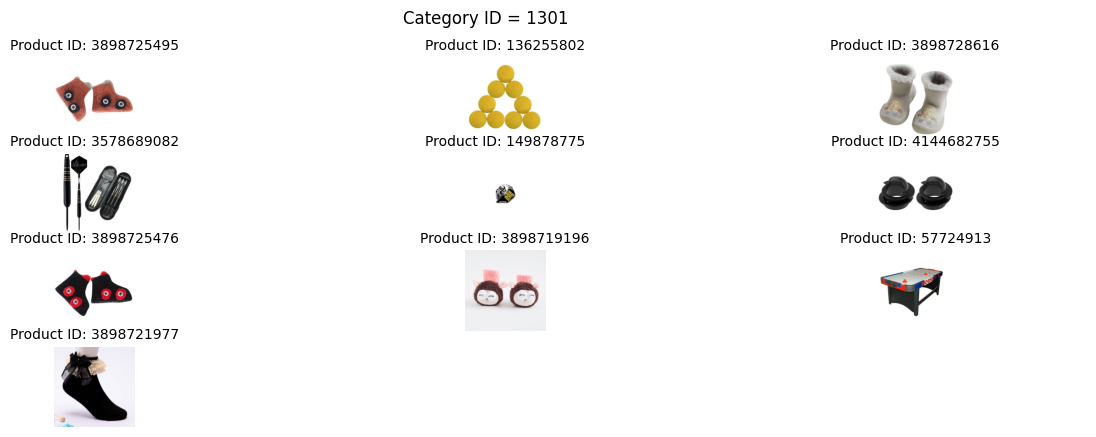

In [89]:
for cat_id in df['prdtypecode'].unique():
    show_images(cat_id, 10)